In [1]:
import os
dataset_dir = os.getcwd()
image_dir = os.path.join(dataset_dir, "Images")
label_dir = os.path.join(dataset_dir, "Labels")

In [2]:
image_dir, label_dir

('/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Labels')

In [60]:
train = [x for x in range(10)]
val = [x for x in range(10, 15)]
image_full_path = list(map(lambda x: os.path.join(image_dir, str(x).zfill(4)) + '.' + "jpg", train))
# image_full_path = list(image_full_path)
label_full_path = list(map(lambda x: os.path.join(label_dir, str(x).zfill(4)) + '.' + "mat", train))
# label_full_path = list(label_full_path)

In [61]:
image_full_path

['/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0000.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0001.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0002.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0003.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0004.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0005.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0006.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0007.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0008.jpg',
 '/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0009.jpg']

In [62]:
tmp = list(zip(image_full_path, label_full_path))

In [63]:
for file, ann in tmp:
    print(file, ann)

/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0000.jpg /Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Labels/0000.mat
/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0001.jpg /Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Labels/0001.mat
/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0002.jpg /Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Labels/0002.mat
/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0003.jpg /Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Labels/0003.mat
/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Images/0004.jpg /Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Labels/0004.mat
/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/D

In [70]:
ann

'/Users/wenyuan/Documents/MII/Tensorflow_template/Tensorflow_template/Dataset/Labels/0009.mat'

In [68]:
import numpy as np
from PIL import Image
import os
import scipy.io
img_org = np.array(Image.open(file))


In [69]:
print(img_org.shape)

(1200, 1200, 3)


In [71]:
key = 'ATmask'
mat = scipy.io.loadmat(ann, mat_dtype=True, 
                       squeeze_me=True, struct_as_record=False)

In [73]:
mat[key].shape

(1200, 1200)

In [85]:
import matplotlib.pyplot as plt

def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

def display_sementic(image, segmentation_mask, num_classes = int(4),
                    title = "", figsize = (16, 16), ax = None):
    label_colours = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0)] # 1:红(benign) 2:绿(low-grade) 3:蓝(high-grade) 4黄(stroma)
    
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
    
    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title(title)
    masked_image = image.astype(np.uint32).copy()
    
    for label in range(1,num_classes+1):
        mask = np.zeros_like(segmentation_mask)
        mask[np.where(segmentation_mask == label)] = 1
        masked_image = apply_mask(masked_image, mask, label_colours[label - 1])
    
    ax.imshow(masked_image.astype(np.uint8))
    plt.show()

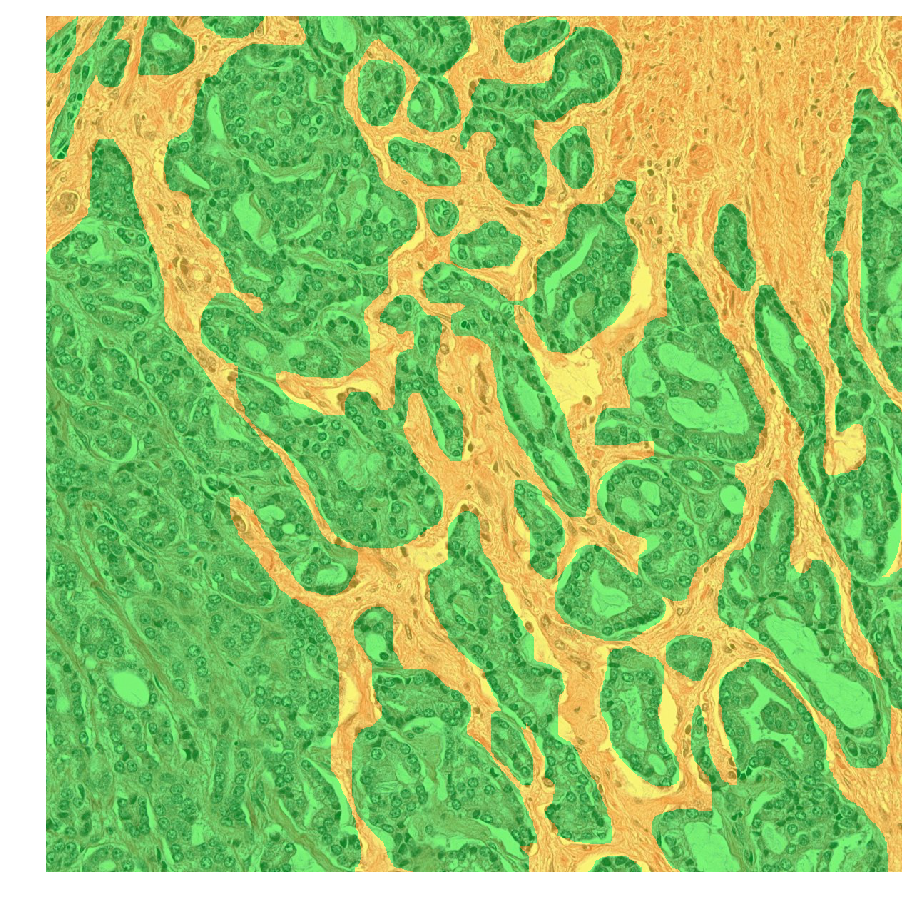

In [86]:
display_sementic(img_org, mat[key])

In [76]:
mat[key]

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ..., 
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4]], dtype=uint8)

In [88]:
if np.isin(4, mat[key]):
    print(4)

4


In [89]:
img_org.shape

(1200, 1200, 3)

In [97]:
a = np.mean(img_org,axis = (0,1))

In [98]:
a.shape

(3,)

In [102]:
a

array([ 196.47102153,  124.22216458,  186.21236597])

In [103]:
a += np.ones(3)

In [104]:
a

array([ 197.47102153,  125.22216458,  187.21236597])